# Assignment 1 Anders Lehmann

## Exercise 1

Some preparations:

A datastructure to represent the network:

In [12]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':10000,'a':0.5,'b':4},
           3:{'T0':10,'C':10000,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           }

nodes = {'O':[1,2],'A':[1,3],'B':[2,4],'D':[3,4]}
Paths = [(1,3),(2,4),(2,5,3)]

Some functions to calculate linktraveltimes (BPR), the integral of BPR, the System Optimum objective function and the derivative of BPR (grad).

The class remembers the data for the link, so that you do not have to call pass the the parameters as arguments, for each calculation.

In [85]:
def BPR(T0,a,b,x,C,**args):
    return T0*(1+a*((x*1.0/C)**b))

def iBPR(T0,a,b,x,C,**args):
    return T0*(x + a/(b+1)/(C**b)*((x*1.0))**(b+1))

def SO(T0,a,b,x,C,**args):
    return T0*(x + a/(C**b)*((x*1.0))**(b+1))

def grad(T0,a,b,x,C,**args):
    return T0*(b)*a/(C**b)*x**(b-1)



class LinkT:
    def __init__(self,v):
        self.v = v
    def __call__(self,x):
        return BPR(x=x,**self.v)
    def iBPR(self,x):
        return iBPR(x=x,**self.v)
    def SysOP(self,x):
        return SO(x=x,**self.v)
    def grad(self,x):
        return grad(x=x,**self.v)
    def cost(self,x):
        return BPR(x=x,**self.v)*self.v['VoT'] + self.v['Toll']
     

def prepare():
    t = []; it = []; so = []; sense =[]
    for i in range(len(network)):
        v = network[i+1]
        f = LinkT(v)
        t.append(f)
        it.append(f.iBPR)
        so.append(f.SysOP)
        sense.append(f.grad)
    return t,it,so,sense

t,it,so,sense = prepare()

### Question 1a:



If only one car enters the network the travel time equal to the lowest travel time of path 1,3 or 2,4, which are both equal to 50 minutes

### Question 1b:



In the user equilibrium, noone can lower their traveltime by changing the route - the travel time for all routes must be equal on all routes.

Path$_{1,3}$ = BPR$_1$ + BPR$_3$ = $T_0^1(1 +{\alpha}^1(\frac{x_{1,3}}{C^1})^{\beta^1}) + T_0^3(1 +{\alpha}^3(\frac{x_{1,3}}{C^3})^{\beta^3})$ 

Path$_{2,4}$ = BPR$_2$ + BPR$_4$ = $T_0^2(1 +{\alpha}^2(\frac{x_{2,4}}{C^2})^{\beta^2}) + T_0^4(1 +{\alpha}^4(\frac{x_{2,4}}{C^4})^{\beta^4})$ 

The traveltime on each path must be equal, and since the to paths have the same parameters, they have the samme traffic volume


The result is that each path takes half of the trafic flow (9500) and the travel time will be

In [14]:
Traveltime =  t[0](9500)+t[2](9500)
Traveltime

70.36265625

### Question 1c:



The System Optimum is when the total travel time is the lowest.



In [15]:
TotFlow = 19000
q_rs = TotFlow

def SO(X1):
    X2 = TotFlow-X1

    return (X1*BPR(50,0.5,4,X1,10000) + X2*BPR(50,0.5,4,X2,10000))/TotFlow


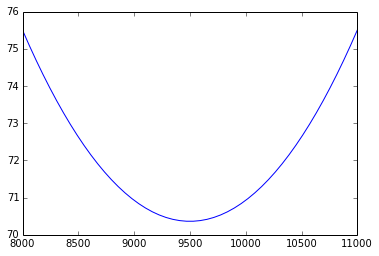

In [16]:
x = linspace(8000, 11000)

plot(x,SO(x))

As it can be seen from the curve, the System Optimum coincides with the User Equilibrium. 

## Exercise 2

### Question 2a:


If only one car enters the network the traveltime will be the lowest possible : 25 minutes (link2, link5 and link 3)

### Question 2b:


The User Equilibrium with ekstra link will be (simplified since $\alpha$ and $\beta$ and the capacity are the same on all links):



$Path_{1,3}$ = BPR$_1$ + BPR$_3$ = $T_0^1(1 +{\alpha}(\frac{x_{1}}{C})^{\beta}) + T_0^3(1 +{\alpha}(\frac{x_{3}}{C})^{\beta})$ 

$Path_{2,4}$ = BPR$_2$ + BPR$_4$ = $T_0^2(1 +{\alpha}(\frac{x_{2}}{C})^{\beta}) + T_0^4(1 +{\alpha}(\frac{x_{4}}{C})^{\beta})$ 

$Path_{2,5,3}$ = BPR$_2$ + BPR$_5$ + BPR$_3$ = $T_0^2(1 +{\alpha}(\frac{x_{2}}{C})^{\beta}) + T_0^5(1 +{\alpha}(\frac{x_{5}}{C})^{\beta}) + T_0^3(1 +{\alpha}(\frac{x_{3}}{C})^{\beta})$ 

The Beckman transform :

$z(x) = \int_0^{x_{1}}T_0^1(1 +{\alpha}(\frac{\omega}{C})^{\beta})d\omega + \int_0^{x_3}T_0^3(1 +{\alpha}(\frac{\omega}{C})^{\beta})d\omega+ \int_0^{x_2}T_0^2(1 +{\alpha}(\frac{\omega}{C})^{\beta})d\omega+ \int_0^{x_4}T_0^4(1 +{\alpha}(\frac{\omega}{C})^{\beta})d\omega+ \int_0^{x_5}T_0^5(1 +{\alpha}(\frac{\omega}{C})^{\beta})d\omega$

which is equal to :

$min(z) = \sum_a T_0^ax_a + \frac{T_0^a\alpha}{C^{\beta}(\beta+1)}x_a^{\beta+1}$





Conditions:

$x_1 + x_2 = 19000$

$x_3 = x_1+ x_5$

$x_2 = x_5 + x_4$

$x_3 + x_4 = 19000$

By symmetry considerations this can be reduced to:

$x_1 = x$

$x_2 = 19000 - x_1$

$x_3 = x_2 = 19000- x_1$

$x_4 = x_1$

$x_5 = x_3 - x_1 = 19000 -2*x_1$




In [27]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':10000,'a':0.5,'b':4},
           3:{'T0':10,'C':10000,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}

def Time253(x2,x5,x3):
    return t[1](x2)+t[4](x5)+t[2](x3)
def Time13(x1,x3):
    return t[0](x1)+t[2](x3)
def Time24(x2,x4):
    return t[1](x2)+t[3](x4)

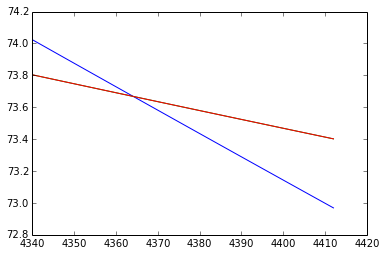

In [18]:
x1 = linspace(4340,4412)

x2 = 19000 -x1
x5 = 19000 -2*x1
x4 = x1 
x3 = 19000 - x4 

t,it,so,sense = prepare()

plot(x1,Time253(x2,x5,x3))
plot(x1,Time13(x1,x3))
plot(x1,Time24(x2,x4))

The graphical solution gives the flows and Path traveltimes:

In [19]:
def flow(x1):
    x2 = 19000 -x1
    x5 = 19000 - 2*x1
    x4 = x1 # Symmetri x2 - x5
    x3 = 19000 - x4 #x1 + x5
    return x1,x2,x3,x4,x5

x1 = 4363
x1,x2,x3,x4,x5 = flow(x1)
print "Flows ",x1,x2,x3,x4,x5
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))

Flows  4363 14637 14637 4363 10274
73.67, 73.67, 73.69


#### Frank-Wolfe algorithm

The following is an attempt at implementing the Frank-Wolfe optimization algorithm for the User equilibrium. It is rough and not very precise, since I have not figured out a way to control the convergence properly. This version is made to keep the runtime minimal.

In [20]:
eps = 0.1

no_f = lambda x:0

def sum_int(x,y,a,t):
    new_x = x + a*(y-x)
    integrals = [t0(nx) for t0,nx in zip(t,new_x)]
    return sum(integrals)

def find_min(x,y,t):
    ma = 1; mi = 0; res = 0
    #while (ma-mi)>eps/50.:
    for i in range(10):
        mini = sum_int(x,y,mi,t)
        maxi = sum_int(x,y,ma,t)    
        
        delta = (ma-mi)/2.
        if maxi<mini:
            mi = mi + delta
            res = mi
        else:
            ma = ma - delta
            res = ma
    return res
        

def UE(do_plot=False):
    def find_Y_alfa(x,Path):
        g = [sum (array([t0(x0) for t0,x0 in zip(p,x)])) for p in Path]

        direction = Paths[g.index(min(g))]
        y = zeros(5)
        for i in direction:
            y[i-1] = q_rs

        alfa = find_min(x,y,it) # Use the integral functions to do the search

        return y,alfa


    error = 1000
    X = array([0,q_rs,q_rs,0,q_rs])
    
    iPath =[(it[0],no_f,it[2],no_f,no_f),(no_f,it[1],no_f,it[3],no_f),(no_f,it[1],it[2],no_f,it[4])]
    Path =[(t[0],no_f,t[2],no_f,no_f),(no_f,t[1],no_f,t[3],no_f),(no_f,t[1],t[2],no_f,t[4])]
    
    T0 = array([t0(x) for t0,x in zip(t,X)])
    
    
    #while error > eps:
    for i in range(25):

    
        Y,alfa = find_Y_alfa(X,Path)
        if do_plot:

            a = linspace(0,1)
            plot(a, [sum_int(X,Y,a0,it) for a0 in a])
            title(alfa)
            figure()
        delta = alfa*(Y-X)
        
        X = X + delta
        #print "X",X

        T0 = array([t0(x) for t0,x in zip(t,X)])
        g = array([sum (array([t0(x0) for t0,x0 in zip(p,X)])) for p in Path])
        #print "g",g    
        error = g.std()
        #print "Q",X[0]+X[1],"Q_o", X[2]+X[3], error    
    return X,T0,g

In [95]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':10000,'a':0.5,'b':4},
           3:{'T0':10,'C':10000,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}

t,it,so,sense = prepare()
UE_X,T0,g=UE()

In [97]:
x1,x2,x3,x4,x5 = UE_X
print UE_X
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))
print T0
print t[4](7000)

[  4373.46913501  14626.53086499  14632.88442663   4367.11557337
  10259.41529162]
73.66, 73.61, 73.58
[ 40.73170203  32.88417879  32.92396698  40.72745936   7.76968544]
5.60025


As can be seen from the above, the implemented algorithm comes close to the real solution.

### Question 2c/d


The travel time increases, compared to exercise 1, as the paths 2 and 3 gets congested, so the travel times on these links become 3 times the freeflow time.

### Question 2e

Below is an attempt to (re)use the Frank-Wolfe algorithm to find the System Optimum

In [23]:
def total_travel_time(u):
    
    return sum(array([t0(x)*x for t0,x in zip(t,u)]))

In [24]:
q_rs = 19000
print total_travel_time(array([0,q_rs,q_rs,0,q_rs]))/q_rs
print total_travel_time(UE_X)/q_rs

187.90125
73.6035185801


In [36]:
def SysOpt(do_plot=False):
    def find_Y_alfa(x,Path):
        g = [sum (array([t0(x0)*x0 for t0,x0 in zip(p,x)])) for p in Path]
        direction = Paths[g.index(min(g))]
    
        y = zeros(5)
        for i in direction:
            y[i-1] = q_rs

        alfa = find_min(x,y,so)
        return y,alfa


    eps = 0.0051
    error = 1e8
    Old_T0 = error*1000
    Path =[(so[0],no_f,so[2],no_f,no_f),(no_f,so[1],no_f,so[3],no_f),(no_f,so[1],so[2],no_f,so[4])]
    
    X = [0,q_rs,q_rs,0,q_rs] 
    T0 = array([t0(x)*x for t0,x in zip(t,X)])
    
    while error > eps:
    #for i in range(10):
    
        Y,alfa = find_Y_alfa(X,Path)
        if do_plot:
            a = linspace(0,1)
            plot(a, [sum_int(X,Y,a0,so) for a0 in a])
            figure()
        delta = alfa*(Y-X)

        X = X + delta
        T0 = array([t0(x)*x for t0,x in zip(t,X)])
        g = array([sum (array([t0(x0)*x0 for t0,x0 in zip(p,X)])) for p in Path])
        error = abs( Old_T0 - sum(T0))/Old_T0
        Old_T0 = sum(T0)
        #print "Q",X[0]+X[1],"Q_o", X[2]+X[3], error, Old_T0/q_rs
    return Old_T0/q_rs, X,g

In [37]:
sys_op = SysOpt()
print sys_op[:2]
print [to(xo) for to,xo in zip(t,sys_op[1])]
x1,x2,x3,x4,x5 = sys_op[1]
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))


(60.52438554723313, array([  6461.28575064,  12538.71424936,  12216.26560211,   6783.73439789,
         5754.97985147]))
[43.485826669465254, 22.358962797578844, 21.13586276287166, 44.23550636411106, 5.2742301735952974]
64.62, 66.59, 48.77


The result for the System Optimisation is a average travel time of 60,5 minutes, and flows for the links 1 through 5 of : 6461, 12539, 12216, 6784, 5755.

The link travel times are 43.5, 22.4, 21.1, 44.2, 5.3 minutes each and the path travel times are : 64.62, 66.59, 48.77

This is not an equilibrium since it would be beneficial for drivers to switch from route 1,3 or 2,4 to 2,3,5.


### Question 2f

In exercise 1 the SO was equal to the UE. This is not the case in the network in exercise 2. The addition of the fast link (link 5) forces traffic from link 1 and 4 to link 2 and 3, which then become congested. The links 1 and 4 are underused and 2 and 3 over used from a system perspective, 

Since the solution for the User Equlibrium means that noone can get a lower traveltime - the travel time of all the other paths will be larger (in the order of seconds) if one driver chooses to change route.

### Question 2g

In [298]:
x1 = 6461
x1,x2,x3,x4,x5 = flow(x1)

print x1,x2,x3,x4,x5
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))
print "One driver changes away from x1"
x1,x2,x3,x4,x5 = flow(x1-1)
print x1,x2,x3,x4,x5
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))

6461 12539 12539 6461 6078
65.85, 65.85, 50.06
One driver changes away from x1
6460 12540 12540 6460 6080
65.85, 65.85, 50.07


The driver that changes will lower the traveltime with app. 15 minutes. The other drivers lose less than a second.

The System optimum is when then average traveltime is at a minimum. But that can sometimes mean, depending on the network, that there ar drivers that experience traveltimes less than the average and others experiencing higher traveltimes. 

### Question 2h

It is not an equilibrium, since there are differences in the traveltimes.

### Question 2i

When the flow on a link approaches the capacity the traveltime on that link will approach infinity, meaning that the traffic will stop in a grid lock.


## Exercise 3

### Question 3a

In [38]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':12500,'a':0.5,'b':4},
           3:{'T0':10,'C':12500,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}

In [39]:
t,it,so,sense = prepare()
eps = 1
ue = UE()
sys_op = SysOpt()

In [40]:
print "User Equilibrium Flow per link {},\n time pr link {} \n and time per path {}".format(*ue)
print 
print "System optimum average travel time  {:.2f} and flows pr link {}".format(*sys_op[:2])


User Equilibrium Flow per link [  2470.9806119   16529.0193881   16523.95230135   2476.04769865
  14052.97168945],
 time pr link [ 40.07456025  25.28686072  25.26812416  40.07517372  14.75018136] 
 and time per path [ 65.34268441  65.36203443  65.30516624]

System optimum average travel time  50.62 and flows pr link [  5454.57702869  13545.42297131  13366.47663917   5633.52336083
   7911.89961049]


### Question 3b

The congestion on link 2 and 3 are still quite high - the low (freeflow) travel time offered on path  2,5,3 forces many more drivers away from link 1 and 4. So these links are underused and the SO is still quite lower than the UE

### Question 3c

In [44]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':12500,'a':0.5,'b':4},
           3:{'T0':10,'C':12500,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':12500,'a':0.5,'b':4},}

In [45]:
t,it,so,sense = prepare()  

ue = UE(False)
sys_op = SysOpt(False)

In [84]:
6.31 *70/60

7.361666666666666

In [46]:
print "User Equilibrium Flow per link {},\n time pr link {} \n and time per path {}".format(*ue)
print 
print "System optimum average travel time  {:.2f} and flows pr link {}".format(*sys_op[:2])

User Equilibrium Flow per link [  1624.77647731  17375.22352269  17385.78363865   1614.21636135
  15761.00716134],
 time pr link [ 40.01393813  28.66601254  28.7114324   40.01357929  11.31881764] 
 and time per path [ 68.72537053  68.67959183  68.69626258]

System optimum average travel time  50.44 and flows pr link [  5224.91619557  13775.08380443  13506.50682952   5493.49317048
   8281.59063395]


It seems that increasing the capacity on link 5 increases the UE instead of reducing it. The SO is reduced a little reflecting the extra capacity in link 5.

The increased capacity on link 5 increases the congestion on links 2 and, thus increasing the traveltime on path 1,3 and 2,4 as well as 2,3,5

### Question 3d

Politicians want to reduce the traveltime for all people (reducing UE), as efficiently as possible (Have the SO as close to the UE as possible).

Below is an example of reducing the freeflow time on link 1 and 4 with 5 minutes (all the capacities are the same). This has the effect of lowering the UE to 58 minutes and the SO to 47 minutes, reducing the difference between SO and UE. 

Since freeflow is determined by speed limits, intersection design, ramp design, overtaking design and other factors, it might be easier/cheaper to improve freeflow instead of capacity, since capacity means more lanes.

My recommendation would be to look at improving freeflow on the slowest links, and I would argue that it would lead to a more efficient and faster road system.

In [47]:
network = {1:{'T0':35,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':10000,'a':0.5,'b':4},
           3:{'T0':10,'C':10000,'a':0.5,'b':4},
           4:{'T0':35,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}

In [48]:
t,it,so,sense = prepare()  

ue = UE(False)
sys_op = SysOpt(False)

In [49]:
print "User Equilibrium Flow per link {},\n time pr link {} \n and time per path {}".format(*ue)
print 
print "System optimum average travel time  {:.2f} and flows pr link {}".format(*sys_op[:2])

User Equilibrium Flow per link [  4966.84037583  14033.15962417  14031.24895105   4968.75104895
   9064.40857522],
 time pr link [ 36.06502269  29.39062758  29.38006928  36.06666243   6.6877103 ] 
 and time per path [ 65.44509197  65.45729001  65.45840716]

System optimum average travel time  56.18 and flows pr link [  7016.26465303  11983.73534697  12267.08234661   6732.91765339
   5250.81769358]


## Exercise 4

### Question 4a

In [91]:
res =[]
for i in range(1,100) :
    network = {1:{'T0':40,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           2:{'T0':10,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           3:{'T0':10,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           4:{'T0':40,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           5:{'T0':5,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':i*1.},}


    t,it,so,sense = prepare()  
    t = [x.cost for x in t]
    ue = UE()
    print ue[2]
    cost = sum([ue[0][i]*ue[1][i]*network[i+1]['VoT'] + network[i+1]['Toll'] for i in range(len(network))])

    res.append( (cost/q_rs,ue,i))
    


[ 85.46553535  85.41411391  85.6150649 ]
[ 85.46553535  85.41411391  86.6150649 ]
[ 85.46553535  85.41411391  87.6150649 ]
[ 85.46553535  85.41411391  88.6150649 ]
[ 85.46553535  85.41411391  89.6150649 ]
[ 85.46553535  85.41411391  90.6150649 ]
[ 85.46553535  85.41411391  91.6150649 ]
[ 85.46553535  85.41411391  92.6150649 ]
[ 85.46553535  85.41411391  93.6150649 ]
[ 85.46553535  85.41411391  94.6150649 ]
[ 85.46553535  85.41411391  95.6150649 ]
[ 85.46553535  85.41411391  96.6150649 ]
[ 85.46553535  85.41411391  97.6150649 ]
[ 85.46553535  85.41411391  98.6150649 ]
[ 85.46553535  85.41411391  99.6150649 ]
[  85.46553535   85.41411391  100.6150649 ]
[  85.46553535   85.41411391  101.6150649 ]
[  85.46553535   85.41411391  102.6150649 ]
[  85.46553535   85.41411391  103.6150649 ]
[  85.46553535   85.41411391  104.6150649 ]
[  85.46553535   85.41411391  105.6150649 ]
[  85.46553535   85.41411391  106.6150649 ]
[  85.46553535   85.41411391  107.6150649 ]
[  85.46553535   85.41411391  108

99
0 99.7886989153 124.634581427


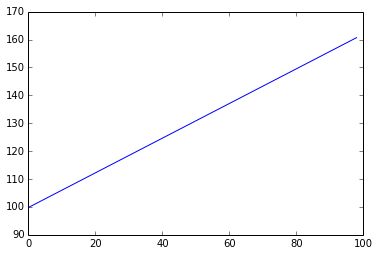

In [87]:
dat = [x[0] for x in res]
#for x in res:
#    dat.append(sum([t0(x0)*x0/q_rs  for t0,x0 in zip(t,x[1])]))

plot(dat)
print len (dat)
print dat.index(min(dat)),min(dat),dat[40]
#for r in res :print r

In [94]:
85./70*60

72.85714285714285

It seems that a toll equal 40 would have the lowest average travel time (I am discarding the minimu at 16, I cant explain why the curve look like this). The value is lower than the SO from exercise 2, but not by much. If the toll is raised to 1500 DKK noone will use the bridge and the SO has the value from exercise 1

### Question 4b

In [303]:
X = [x[1] for x in res]
print X[40]
lt =[to(xo) for to,xo in zip(t,X[40])]

x1 = round(X[40][0])
print x1, X[0][0]
x1,x2,x3,x4,x5 = flow(x1)
print x1,x2,x3,x4,x5
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))
print "One driver changes away from x1"
x1,x2,x3,x4,x5 = flow(x1-1)
print x1,x2,x3,x4,x5
print "{:.2f}, {:.2f}, {:.2f}".format(Time13(x1,x3),Time24(x2,x4),Time253(x2,x5,x3))

[  7379.34928292  11620.65071708  12232.40190223   6767.59809777
   4853.05261931]
7379.0 6472.76567153
7379.0 11621.0 11621.0 7379.0 4242.0
65.05, 65.05, 43.32
One driver changes away from x1
7378.0 11622.0 11622.0 7378.0 4244.0
65.05, 65.05, 43.33


A driver changing from path 1,3 to 2,5,3 will gain 22 minutes up from 15 minutes in exercise 2.

The toll on the bridge has moved traffic away from the fast path 2,3,5 and onto the two other paths, thus increasing the difference between the fast and the slow path.

### Question 4c

For a company the most income would be generated by finding the toll which maximizes $Toll*X_5$

In [93]:
22.*70/60

25.666666666666668

IndexError: list index out of range

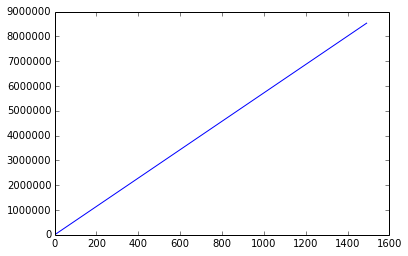

In [92]:
dat = []
res =[]
rnge = range(1,1500,10)
for i in  rnge:
    network = {1:{'T0':40,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           2:{'T0':10,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           3:{'T0':10,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           4:{'T0':40,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':0},
           5:{'T0':5,'C':10000,'a':0.5,'b':4,'VoT':70./60,'Toll':i*1.},}


    t,it,so,sense = prepare()  
    so = [x.cost for x in t]
#ue = UE()
    x = SysOpt(False)
    res.append(x +(i,))
    xx = flow(x[1][0])
    toll = i
    dat.append((xx[-1]*toll) )
plot(rnge,dat)
idx = dat.index(max(dat))
x1 = round(res[idx+1][1][0])
print res[idx][-1]
print flow(x1)
print Time13(x1,x3)
print Time24(x2,x4)
print Time253(x2,x5,x3)

A toll of 861 DKK would optimise the income from the Bridge Toll. 

### Question 4d

A company would seek to maximise its profits as seen in Question 4c. This will move the traffic away from the toll road, and from a system point of view lead to underutilisation of the bridge.

From a user point of view the cost of travel would rise, since the heavy toll would lead to more traffic on the other links.

### Question 4e

A PPP would be more inclined to seek to adjust the toll towards securing the SO, less inclined to maximise for income. When public money is invested in infrastructure, there will also be political pressure to ensure as low an UE as possible.

## Exercise 5

### Option 1

In [271]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':12500,'a':0.5,'b':4},
           3:{'T0':10,'C':12500,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}

In [272]:
network[4]['T0'] = 20

t,it,so,sensse = prepare()  

ue = UE(False)
sys_op = SysOpt(False)

In [273]:
print "User Equilibrium Flow per link {}, \ntime pr link {}\nand time per path{}".format(ue[0],ue[1],ue[2])
print
print "System optimum average travel time {}\nand flows pr link {}".format(sys_op[0],sys_op[1])


User Equilibrium Flow per link [   976.67598724  18023.32401276  11863.01765498   7136.98234502
  10886.34166773], 
time pr link [ 40.00181984  31.61073378  14.05611873  22.59452876   8.51129931]
and time per path[ 54.05793857  54.20526254  54.17815182]

System optimum average travel time 43.422790044
and flows pr link [  5302.08274039  13697.91725961  12420.58649566   6579.41350434
   7118.50375527]


### Option 2

In [274]:
network[4]['T0'] = 30
network[1]['T0'] = 25

t,it,so,sense = prepare()  

ue = UE(False)
sys_op = SysOpt(False)

In [275]:
print "User Equilibrium Flow per link {}, \ntime pr link {}\nand time per path{}".format(ue[0],ue[1],ue[2])
print
print "System optimum average travel time {}\nand flows pr link {}".format(sys_op[0],sys_op[1])



User Equilibrium Flow per link [  5085.41460614  13914.58539386  15601.75664444   3398.24335556
  10516.3420383 ], 
time pr link [ 25.83601771  17.67734459  22.13455768  30.20003646   8.05772779]
and time per path[ 47.97057539  47.87738105  47.86963006]

System optimum average travel time 42.0838776116
and flows pr link [  6188.67588944  12811.32411056  12889.89235181   6110.10764819
   6701.21646237]


### Option 3

In [278]:
network = {1:{'T0':40,'C':10000,'a':0.5,'b':4},
           2:{'T0':10,'C':25000,'a':0.5,'b':4},
           3:{'T0':10,'C':12500,'a':0.5,'b':4},
           4:{'T0':40,'C':10000,'a':0.5,'b':4},
           5:{'T0':5,'C':10000,'a':0.5,'b':4},}
t,it,so,sense = prepare()  

ue = UE(False)
sys_op = SysOpt(False)

In [279]:
print "User Equilibrium Flow per link {}, \ntime pr link {}\nand time per path{}".format(ue[0],ue[1],ue[2])
print
print "System optimum average travel time {}\nand flows pr link {}".format(sys_op[0],sys_op[1])



User Equilibrium Flow per link [     0.          19000.          15352.82485221   3647.17514779
  15352.82485221], 
time pr link [ 40.          11.6681088   21.37845075  40.35388037  18.88971039]
and time per path[ 61.37845075  52.02198917  51.93626994]

System optimum average travel time 43.2705255027
and flows pr link [  1334.65099335  17665.34900665  12565.25861379   6434.74138621
  11230.60762044]


### Question 5a


I could not make the Frank-Wolfe algorithm converge for Option 3. This happens because the increased capacity on link 2 removes all traffic on link 1. The travel time on link 1 still incorporated in the traveltime for path 1,3 even though noone uses that path any more - so we should not consider this path (stated in Sheffi as "The traveltimes should be equal on all used paths, and less or equal to any unused path.

So the flows presented in Option 3 are indeed correct even though only a few iteration of Frank-Wolfe was used.

I would propose option 2 as it have the lowest UE and the UE is closest to the SO. The SO for all options are quite low and close to each other.



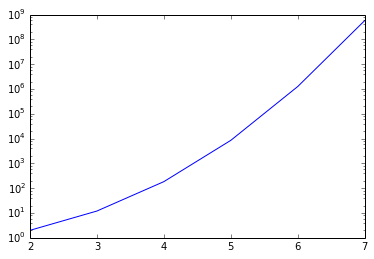

In [12]:
res = [(2,2),(3,12),(4,184),(5,8512),(6,1262816),(7,575780564)]
resy = [x[1] for x in res]
fig = plot([x[0] for x in res],resy)
yscale('log')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
